### Model Training
Importing Pandas, Numpy, Matplotlib, Searborn, Warnings Library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
X = df.drop(columns=['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [14]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [17]:
num_features = X.select_dtypes(exclude='O').columns
cat_features = X.select_dtypes(include='O').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', cat_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [18]:
X = preprocessor.fit_transform(X)

In [21]:
X.shape

(1000, 19)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [25]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    return mae, rmse, r2

In [27]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'CatBoostRegressor': CatBoostRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolure Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('-'*35)

    print('Model Performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolure Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')

LinearRegression
Model Performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolure Error: 4.2667
- R2 Score: 0.8743
-----------------------------------
Model Performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolure Error: 4.2148
- R2 Score: 0.8804


Lasso
Model Performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolure Error: 5.2063
- R2 Score: 0.8071
-----------------------------------
Model Performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolure Error: 5.1579
- R2 Score: 0.8253


Ridge
Model Performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolure Error: 4.2650
- R2 Score: 0.8743
-----------------------------------
Model Performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolure Error: 4.2111
- R2 Score: 0.8806


KNeighborsRegressor
Model Performance for Training set
- Root Mean Squared Error: 5.7091
- Mean Absolure Error: 4.5175
- R2 Score: 0.8554
-----------------------

In [31]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model_Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model_Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
6,AdaBoostRegressor,0.852761
5,CatBoostRegressor,0.851632
1,Lasso,0.825320
3,KNeighborsRegressor,0.783497
4,DecisionTreeRegressor,0.731547


Linear Regression

In [33]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the Model is %.2f" %score)

Accuracy of the Model is 88.04


Text(0, 0.5, 'Predicted')

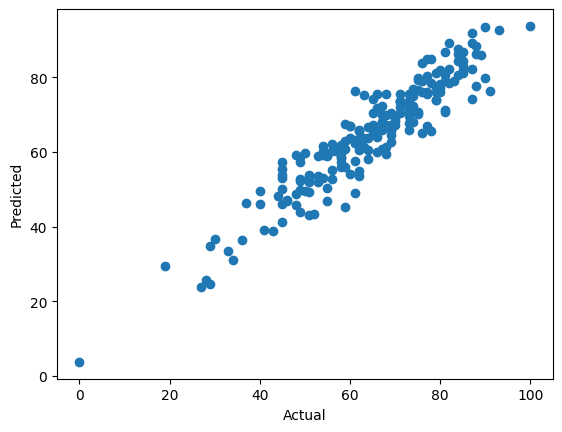

In [35]:
# Plot y_pred vs y_test
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

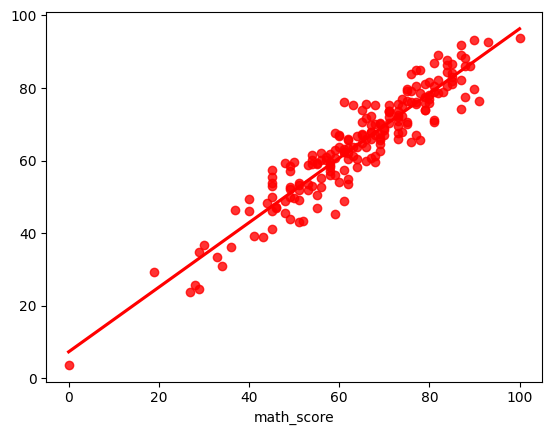

In [37]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='r')

In [38]:
# Differance between Actual and Predicted Values
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
